In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
len(test_labels)

10000

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([ 
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

#output of layer0 = relu (dot (input, W) + b)

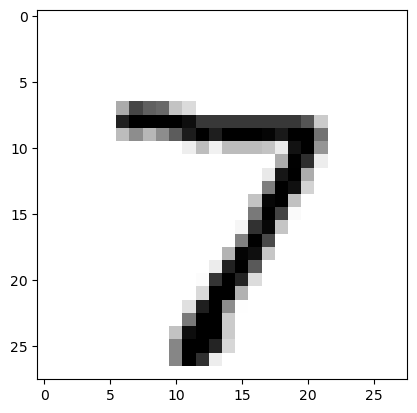

In [8]:
import matplotlib.pyplot as plt
digit = test_images[0] 
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [9]:
'''
An optimizer: The mechanism through which the model will update itself based on the training 
data it sees to improve its performance.

A loss function: Used by the model to measure its performance on the training data, 
which will enable it to steer itself in the right direction.

Metrics to monitor during training and testing: This is where we measure the accuracy 
(the fraction of the images that were correctly classified)
'''

'\nAn optimizer: The mechanism through which the model will update itself based on the training \ndata it sees to improve its performance.\n\nA loss function: Used by the model to measure its performance on the training data, \nwhich will enable it to steer itself in the right direction.\n\nMetrics to monitor during training and testing: This is where we measure the accuracy \n(the fraction of the images that were correctly classified)\n'

In [10]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
#reshaping the data
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

#normalizing pixel values to the range [0, 1] 
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [12]:
test_images.shape

(10000, 784)

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2532 - accuracy: 0.9265
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0380 - accuracy: 0.9886


In [14]:
model.layers[1].get_weights()

[array([[ 0.01684484,  0.03118683, -0.23772441, ..., -0.17678183,
          0.07182003,  0.05197372],
        [ 0.00214094,  0.03883466,  0.11994562, ..., -0.01934689,
         -0.06030573,  0.06538935],
        [ 0.05862735, -0.10376564,  0.03489564, ..., -0.22844824,
          0.0335828 , -0.0351016 ],
        ...,
        [ 0.0082052 ,  0.28592333, -0.13518046, ...,  0.11881896,
         -0.30407354, -0.27004227],
        [-0.31132814,  0.16875091, -0.17628098, ...,  0.14653303,
         -0.30932856,  0.01273876],
        [-0.18948027, -0.08005875, -0.0552868 , ...,  0.03994413,
         -0.12475712, -0.06981491]], dtype=float32),
 array([-0.05804056, -0.02235302, -0.01797183, -0.01394564,  0.01343449,
         0.03174796, -0.04055233, -0.0156183 ,  0.07281039, -0.00861281],
       dtype=float32)]

In [15]:
#layer 0 weights
#each unit has 784 weights and the number of units are 512 -> (784,512)
model.layers[0].get_weights()[0].shape

(784, 512)

In [16]:
#layer 0 bias
model.layers[0].get_weights()[1].shape

(512,)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 40ms/step


array([1.73627342e-07, 1.02313734e-10, 6.43300382e-06, 2.32671999e-04,
       9.20577200e-13, 2.68087952e-08, 1.25614859e-15, 9.99729335e-01,
       2.01641956e-06, 2.93236426e-05], dtype=float32)

In [19]:
predictions[0].argmax()

7

In [20]:
predictions[0][7]

0.99972934

In [21]:
test_labels [0]

7

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: (test_acc)")

313/313 [==============================] - 0s 624us/step - loss: 0.0767 - accuracy: 0.9769
test_acc: (test_acc)


In [24]:
#Data representations:
import numpy as np
X = np.array (12)
X

array(12)

In [25]:
#A scalar tensor has 0 axes (ndim = 0). 
X.ndim

0

In [26]:
#A vector tensor has 1 axes (ndim = 1). Rank 1 Tensor or 1D tensor
x = np.array ([12, 3, 6, 14, 7])
x.ndim

1

In [27]:
'''
This vector has five entries and so is called a 5-dimensional (5D) vector. 
Don’t confuse a 5D vector with a 5D tensor! A 5D vector has only one axis and has five 
dimensions along its axis, whereas a 5D tensor has five axes and may have any number 
of dimensions along each axis.
'''
x = np.array ([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])
x.ndim

2

In [28]:
#Rank 3 Tensor
x = np.array ([[ 
    [5, 78, 2, 34, 0],
    [6, 79, 3, 35, 11],
    [7, 80, 4, 36, 2]],
    [[5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]],
    [[5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]]])
x.ndim

3

In [29]:
'''
A tensor is defined by three key attributes: 

- Number of axes or Rank
- Shape: This is a tuple of integers that describes how many dimensions the tensor 
         has along each axis.
- Data Type: Usually called dtype in Python libraries. It is the type of data contained 
             in the tensor which could be float16, float32, float64, uint8, and so on.
'''

'\nA tensor is defined by three key attributes: \n\n- Number of axes or Rank\n- Shape: This is a tuple of integers that describes how many dimensions the tensor \n         has along each axis.\n- Data Type: Usually called dtype in Python libraries. It is the type of data contained \n             in the tensor which could be float16, float32, float64, uint8, and so on.\n'

In [30]:
train_images.ndim

2

In [31]:
train_images.dtype

dtype('float32')

In [32]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [33]:
my_slice = train_images [10:100]
my_slice.shape

(90, 28, 28)

In [34]:
my_slice = train_images [10:100,:, :]
my_slice.shape

(90, 28, 28)

In [35]:
my_slice = train_images [10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [36]:
#selecting 14×14 pixels in the bottom-right corner of all images
my_slice = train_images [:, 14:, 14:]

In [37]:
#to crop the images to patches of 14 × 14 pixels centered in the middle
my_slice = train_images [:, 7:-7, 7:-7]